# ATC class prediction from Morgan Fingerprints using Random Forests

### Jiří Reiniš  
reinijir@fit.cvut.cz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix, classification_report, plot_confusion_matrix, fbeta_score

In [4]:
data = pd.read_pickle("data/dataset_master_multiclass_encoded_pickled")

In [5]:
display(data.shape)

(3797, 22)

In [6]:
data.dtypes

KEGG_ID              object
primary_name         object
PubChem_SID          object
PubChem_CID          object
MolecularFormula     object
MolecularWeight     float64
CanonicalSMILES      object
FP2                  object
S1                  float64
S10                 float64
S11                 float64
S12                 float64
S13                 float64
S14                 float64
S2                  float64
S3                  float64
S4                  float64
S5                  float64
S6                  float64
S7                  float64
S8                  float64
S9                  float64
dtype: object

In [7]:
X = [x for x in data.FP2]
Y = data.iloc[:,8:22]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=69)
Y_test.reset_index(drop = True, inplace = True)
Y_train.reset_index(drop = True, inplace = True)

In [9]:
X_train[1]

array([1, 1, 0, ..., 0, 0, 0])

In [10]:
forest = RandomForestClassifier()
multi_target_forest = MultiOutputClassifier(forest)

multi_target_forest.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                  

In [11]:
pred = multi_target_forest.predict(X_test)

In [12]:
len(pred)

1254

In [13]:
Y_pred = pd.DataFrame(pred)
Y_pred.columns = Y_test.columns
Y_pred.head()

S1  S10  S11  S12  S13  S14   S2   S3   S4   S5   S6   S7   S8   S9
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [14]:
Y_test.head()

S1  S10  S11  S12  S13  S14   S2   S3   S4   S5   S6   S7   S8   S9
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

## Multiclass classification metrics:
- based on: https://pubs.rsc.org/en/content/articlelanding/2013/mb/c3mb25555g#
- 6 metrics, each trying to capture a different aspect of multiclass classification  
&nbsp;

- **notation:**
    - $\mathbb{L}$ is the set of all possible labels, $\lVert\mathbb{L}\rVert = M$ is the number of classes
    - $\mathbb{L}_k$ is the set of all (true) labels of sample $k$
    - $\mathbb{L}_k^*$ is the set of predicted labels of sample $k$
    - $N$ is the number of samples
    - $\Delta(\mathbb{L}_k, \mathbb{L}_k^*)$ is 1 if $\mathbb{L}_k$ and $\mathbb{L}_k^*$ are identical, otherwise is 0  
    - $\Gamma(\mathbb{L}_k, \mathbb{L}_k^*)$ is 0 if $\mathbb{L}_k^*$ is 0 (no class predicted), otherwise is equal to:
$$\frac{\lVert\mathbb{L}_k\cap\mathbb{L}_k^*\rVert}{\lVert\mathbb{L}_k^*\rVert}$$
&nbsp;  
  
- **Aiming**
    - definition slightly changed from original article
$$\text{Aiming} = \frac{1}{N}\sum_{k = 1}^{N}\Gamma(\mathbb{L}_k, \mathbb{L}_k^*)$$

    
- **Coverage**
$$\text{Coverage} = \frac{1}{N}\sum_{k = 1}^{N}\frac{\lVert\mathbb{L}_k\cap\mathbb{L}_k^*\rVert}{\lVert\mathbb{L}_k\rVert}$$

    
- **Accuracy**
$$\text{Accuracy} = \frac{1}{N}\sum_{k = 1}^{N}\frac{\lVert\mathbb{L}_k\cap\mathbb{L}_k^*\rVert}{\lVert\mathbb{L}_k\cup\mathbb{L}_k^*\rVert}$$

- **Absolute-True**
$$\text{Absolute-True} = \frac{1}{N}\sum_{k = 1}^{N}\Delta(\mathbb{L}_k, \mathbb{L}_k^*)$$

- **Absolute-False**
$$\text{Absolute-False} = \frac{1}{N}\sum_{k = 1}^{N}\frac{\lVert\mathbb{L}_k\cup\mathbb{L}_k^*\rVert - \lVert\mathbb{L}_k\cap\mathbb{L}_k^*\rVert}{M}$$

In [15]:
def get_metrics(Y_true, Y_pred):
    classes = [1,10,11,12,13,14,2,3,4,5,6,7,8,9]
    N = len(Y_true)
    M = len(classes)
    
    aiming, coverage, accuracy = 0,0,0
    abstrue, absfalse = 0,0
    
    for i in range(N):
        # get true and predicted class labels for record
        real = set([a*b for a,b in zip([int(x) for x in Y_true.iloc[i]], classes) if a*b])
        pred = set([a*b for a,b in zip([int(x) for x in Y_pred.iloc[i]], classes) if a*b])
        
        real_pred_intersect_n = len(real.intersection(pred))
        real_pred_union_n = len(real.union(pred))

        if len(pred):
            aiming  += real_pred_intersect_n/len(pred)
        coverage += real_pred_intersect_n/len(real)
        if real_pred_union_n:
            accuracy += real_pred_intersect_n/real_pred_union_n
        if real == pred:
            abstrue += 1
            
        absfalse += (real_pred_union_n - real_pred_intersect_n)/M
    aiming, coverage, accuracy, abstrue, absfalse = aiming/N, coverage/N, accuracy/N, abstrue/N, absfalse/N
    print("aiming = {}\ncoverage = {}\naccuracy = {}\nabstrue = {}\nabsfalse = {}".format(
        aiming, coverage, accuracy, abstrue, absfalse))

print("Train set")
get_metrics(Y_train, pd.DataFrame(multi_target_forest.predict(X_train)))
print()
print("Test set")    
get_metrics(Y_test, Y_pred)

Train set
aiming = 0.9966574911521825
coverage = 0.9963953335954908
accuracy = 0.9958054790929347
abstrue = 0.994494691309477
absfalse = 0.0005617661929105105

Test set
aiming = 0.5581472620946306
coverage = 0.5589181286549707
accuracy = 0.5457602339181288
abstrue = 0.5223285486443381
absfalse = 0.04197994987468663


#### Calculate also F-beta score (beta = 2)

In [26]:
print("F-beta:\ntrain set", fbeta_score(Y_test, Y_pred, 2, average='samples'))
print("test set", fbeta_score(Y_train, pd.DataFrame(multi_target_forest.predict(X_train)), 2, average='samples'))

F-beta:
train set 0.5550637263716053
test set 0.9962844207830445


In [60]:
cf = multilabel_confusion_matrix(Y_test, Y_pred, samplewise=False)

#### Confusion matrices

[(<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff5662d7f90>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565f85050>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565f43d50>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565f0fad0>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565eda950>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565ea6650>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565def490>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565db91d0>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff565d78e90>), (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubpl

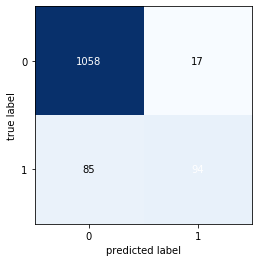

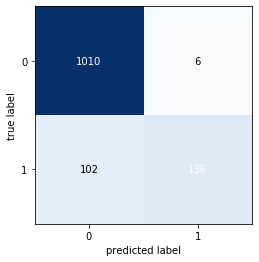

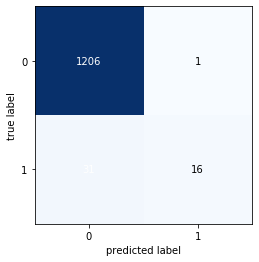

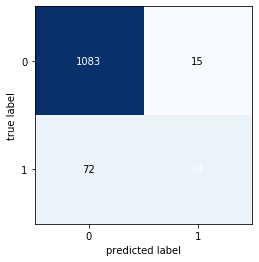

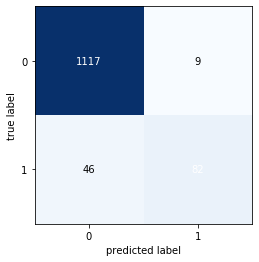

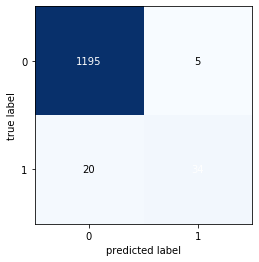

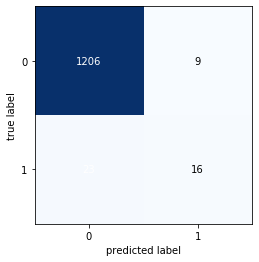

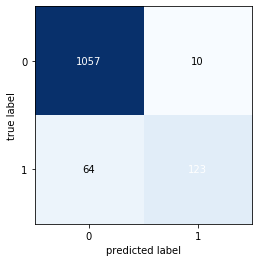

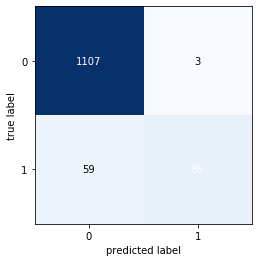

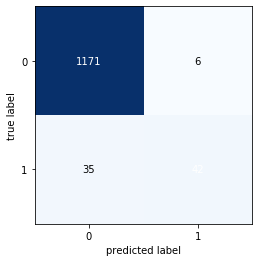

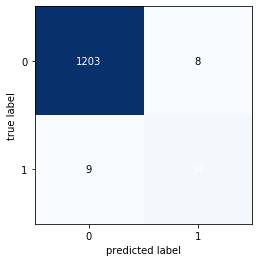

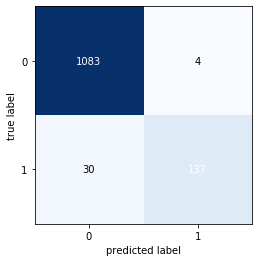

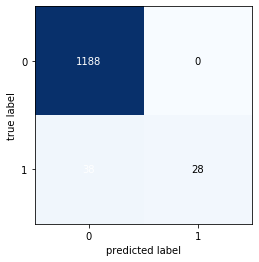

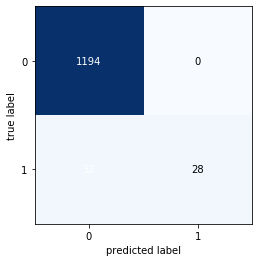

In [70]:
print([plot_confusion_matrix(x) for x in cf])